In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Data Link**

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [48]:
# To connect google drive mountin drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data = pd.read_csv('/content/drive/My Drive/Datasets/creditcard.csv')

In [50]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
data.shape

(284807, 31)

In [52]:
# checking if there are any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
# watching legitmate and fraud datasets number
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Balance dataset**
We seen that our data is not uniform
i.e fraud data are only 495 less than 1000 but non-fraud datasets are about 284315

In [54]:
# separating fraud and non fraud data
non_fraud_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] ==1]

In [55]:
non_fraud_data.shape,fraud_data.shape

((284315, 31), (492, 31))

In [56]:
# selecting  only 492 non_fraud or legitmate data equal to fraud_data
# Because  data are not uniform

# Go select randomly we are using sample
non_fraud_data = non_fraud_data.sample(fraud_data.shape[0])
non_fraud_data.shape
# Now we have only 492 random non_fraud data


(492, 31)

In [57]:
# Merging fraud and non_fraud dataframe together
data = fraud_data.append(non_fraud_data,ignore_index=True)


In [58]:
data.shape

(984, 31)

In [59]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [60]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [61]:
input_features = data.drop('Class',axis = 1)
output_labels = data['Class']
input_features.shape,output_labels.shape

((984, 30), (984,))

In [62]:
x_train,x_test,y_train,y_test = train_test_split(input_features,output_labels,test_size = 0.2,random_state=101,stratify = output_labels)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [64]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
869,158586.0,0.013029,0.548189,-0.281374,-0.981259,1.015729,0.153499,1.226336,-0.293763,0.159241,-0.019087,-0.640666,-0.355410,-1.087729,0.177368,-1.091788,0.322566,-1.112452,0.279715,0.830171,-0.188697,-0.254543,-0.603002,-0.167088,-1.404761,-0.378479,0.217792,-0.420462,-0.225568,53.29
447,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47
243,74262.0,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,0.174216,-2.998926,2.605169,-3.677717,-0.961255,-4.629481,1.942182,-4.180379,-4.605686,-2.557184,1.589582,-0.486537,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,311.28
865,120400.0,-1.230026,0.962834,2.518963,1.944138,1.141186,0.691246,0.361695,0.405838,-1.214381,0.045805,-1.801251,-0.804933,-0.375981,-0.404566,-1.398893,1.608901,-1.351937,0.083180,-2.911154,-0.192429,0.180520,0.306234,-0.405332,0.560208,0.740725,-0.052156,-0.007257,0.069553,0.75
82,29531.0,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,-2.335933,2.111517,-2.591950,-1.950589,-7.311580,0.077753,2.290608,6.509272,2.569971,-3.286150,-0.089062,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.68


In [65]:
# We need to standardize data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Converting y values to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [66]:
# CNN takes 3 dimensional data as input
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [67]:
x_train.shape,x_test.shape

((787, 30, 1), (197, 30, 1))

In [68]:
x_train[0].shape

(30, 1)

**Build CNN**

In [69]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size =(2),activation='relu',input_shape=(x_train[0].shape) ))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters =64,kernel_size =(2),activation='relu') )
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [71]:
model.compile(optimizer =Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history = model.fit(x_train,y_train,epochs =50,validation_data=(x_test,y_test),verbose =1)

Epoch 1/50
25/25 [==============================] - 0s 15ms/step - loss: 0.4936 - accuracy: 0.8297 - val_loss: 0.5255 - val_accuracy: 0.5482
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.9238 - val_loss: 0.5532 - val_accuracy: 0.5025
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2059 - accuracy: 0.9288 - val_loss: 0.6301 - val_accuracy: 0.5025
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2023 - accuracy: 0.9288 - val_loss: 0.6022 - val_accuracy: 0.5025
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.1874 - accuracy: 0.9377 - val_loss: 0.8086 - val_accuracy: 0.5025
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.1678 - accuracy: 0.9416 - val_loss: 0.7816 - val_accuracy: 0.5025
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.1606 - accuracy: 0.9454 - val_loss: 0.5991 - val_accuracy: 0.5076
Epoch 8/50
25/25 [=

In [73]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

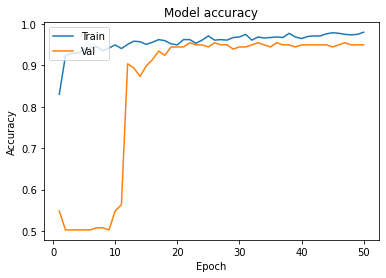

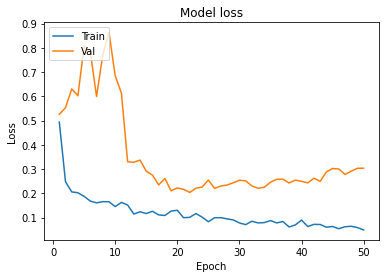

In [76]:
plot_learningCurve(history,50)

**Adding Maxpool**

In [78]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size =(2),activation='relu',input_shape=(x_train[0].shape) ))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters =64,kernel_size =(2),activation='relu') )
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [79]:
model.compile(optimizer =Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
history = model.fit(x_train,y_train,epochs =50,validation_data=(x_test,y_test),verbose =1)

Epoch 1/50
25/25 [==============================] - 0s 13ms/step - loss: 0.5650 - accuracy: 0.7789 - val_loss: 0.5607 - val_accuracy: 0.8528
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3136 - accuracy: 0.8907 - val_loss: 0.5293 - val_accuracy: 0.8579
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.8983 - val_loss: 0.4890 - val_accuracy: 0.8426
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2412 - accuracy: 0.9136 - val_loss: 0.4584 - val_accuracy: 0.8579
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.8971 - val_loss: 0.4258 - val_accuracy: 0.8477
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.9136 - val_loss: 0.3992 - val_accuracy: 0.8832
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.9199 - val_loss: 0.3594 - val_accuracy: 0.9239
Epoch 8/50
25/25 [=

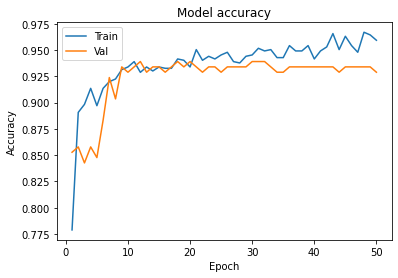

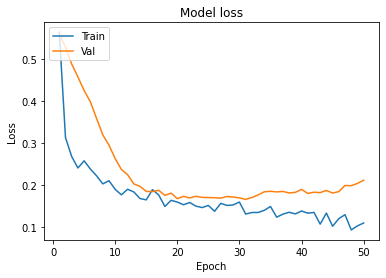

In [81]:
plot_learningCurve(history,50)

Testing model

In [148]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size =(2),activation='relu',input_shape=(x_train[0].shape) ))
model.add(MaxPool1D(2))
model.add(BatchNormalization())



# model.add(Conv1D(filters =64,kernel_size =(2),activation='relu') )
# model.add(MaxPool1D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [149]:
model.compile(optimizer =Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [150]:
history = model.fit(x_train,y_train,epochs =50,validation_data=(x_test,y_test),verbose =1)

Epoch 1/50
25/25 [==============================] - 0s 9ms/step - loss: 0.4278 - accuracy: 0.8234 - val_loss: 0.4859 - val_accuracy: 0.9188
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.9022 - val_loss: 0.4323 - val_accuracy: 0.9391
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9123 - val_loss: 0.3996 - val_accuracy: 0.9391
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9301 - val_loss: 0.3720 - val_accuracy: 0.9289
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1926 - accuracy: 0.9339 - val_loss: 0.3390 - val_accuracy: 0.9340
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9390 - val_loss: 0.3089 - val_accuracy: 0.9340
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9377 - val_loss: 0.2686 - val_accuracy: 0.9391
Epoch 8/50
25/25 [==

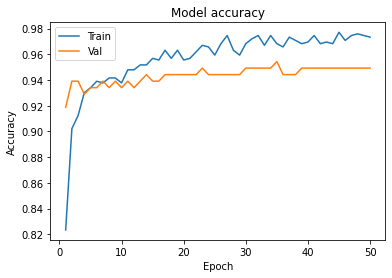

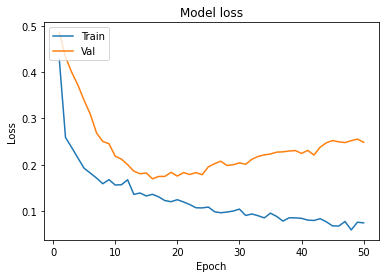

In [151]:
plot_learningCurve(history,50)